In [2]:
import tensorflow as tf
import numpy as np
import tensorflow.keras.layers as layers

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
notebook = []

class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        try: 
            test_loss, test_accuracy = model.evaluate(x_test, y_test)
            notebook.append(test_accuracy)
            if test_accuracy > 0.99:
                print("\nReached 99% accuracy, stopping training.")
                self.model.stop_training = True
        except Exception as e:
            print(f"An error of type {type(e).__name__} occurred.")

In [3]:
x_test, x_train = x_test/255, x_train/255

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 26, 26, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_11             │ (None, 11, 11, 26)     │           306 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 11, 11, 26)     │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 11, 11, 26)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_10             │ (None, 11, 11, 26)     │           936 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 11, 11, 26)     │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_10             │ (None, 11, 11, 26)     │           936 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 11, 11, 26)     │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_10             │ (None, 11, 11, 26)     │           936 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 11, 11, 26)     │           104 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 26)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 2,436 (9.52 KB)

 Trainable params: 2,180 (8.52 KB)

 Non-trainable params: 256 (1.00 KB)

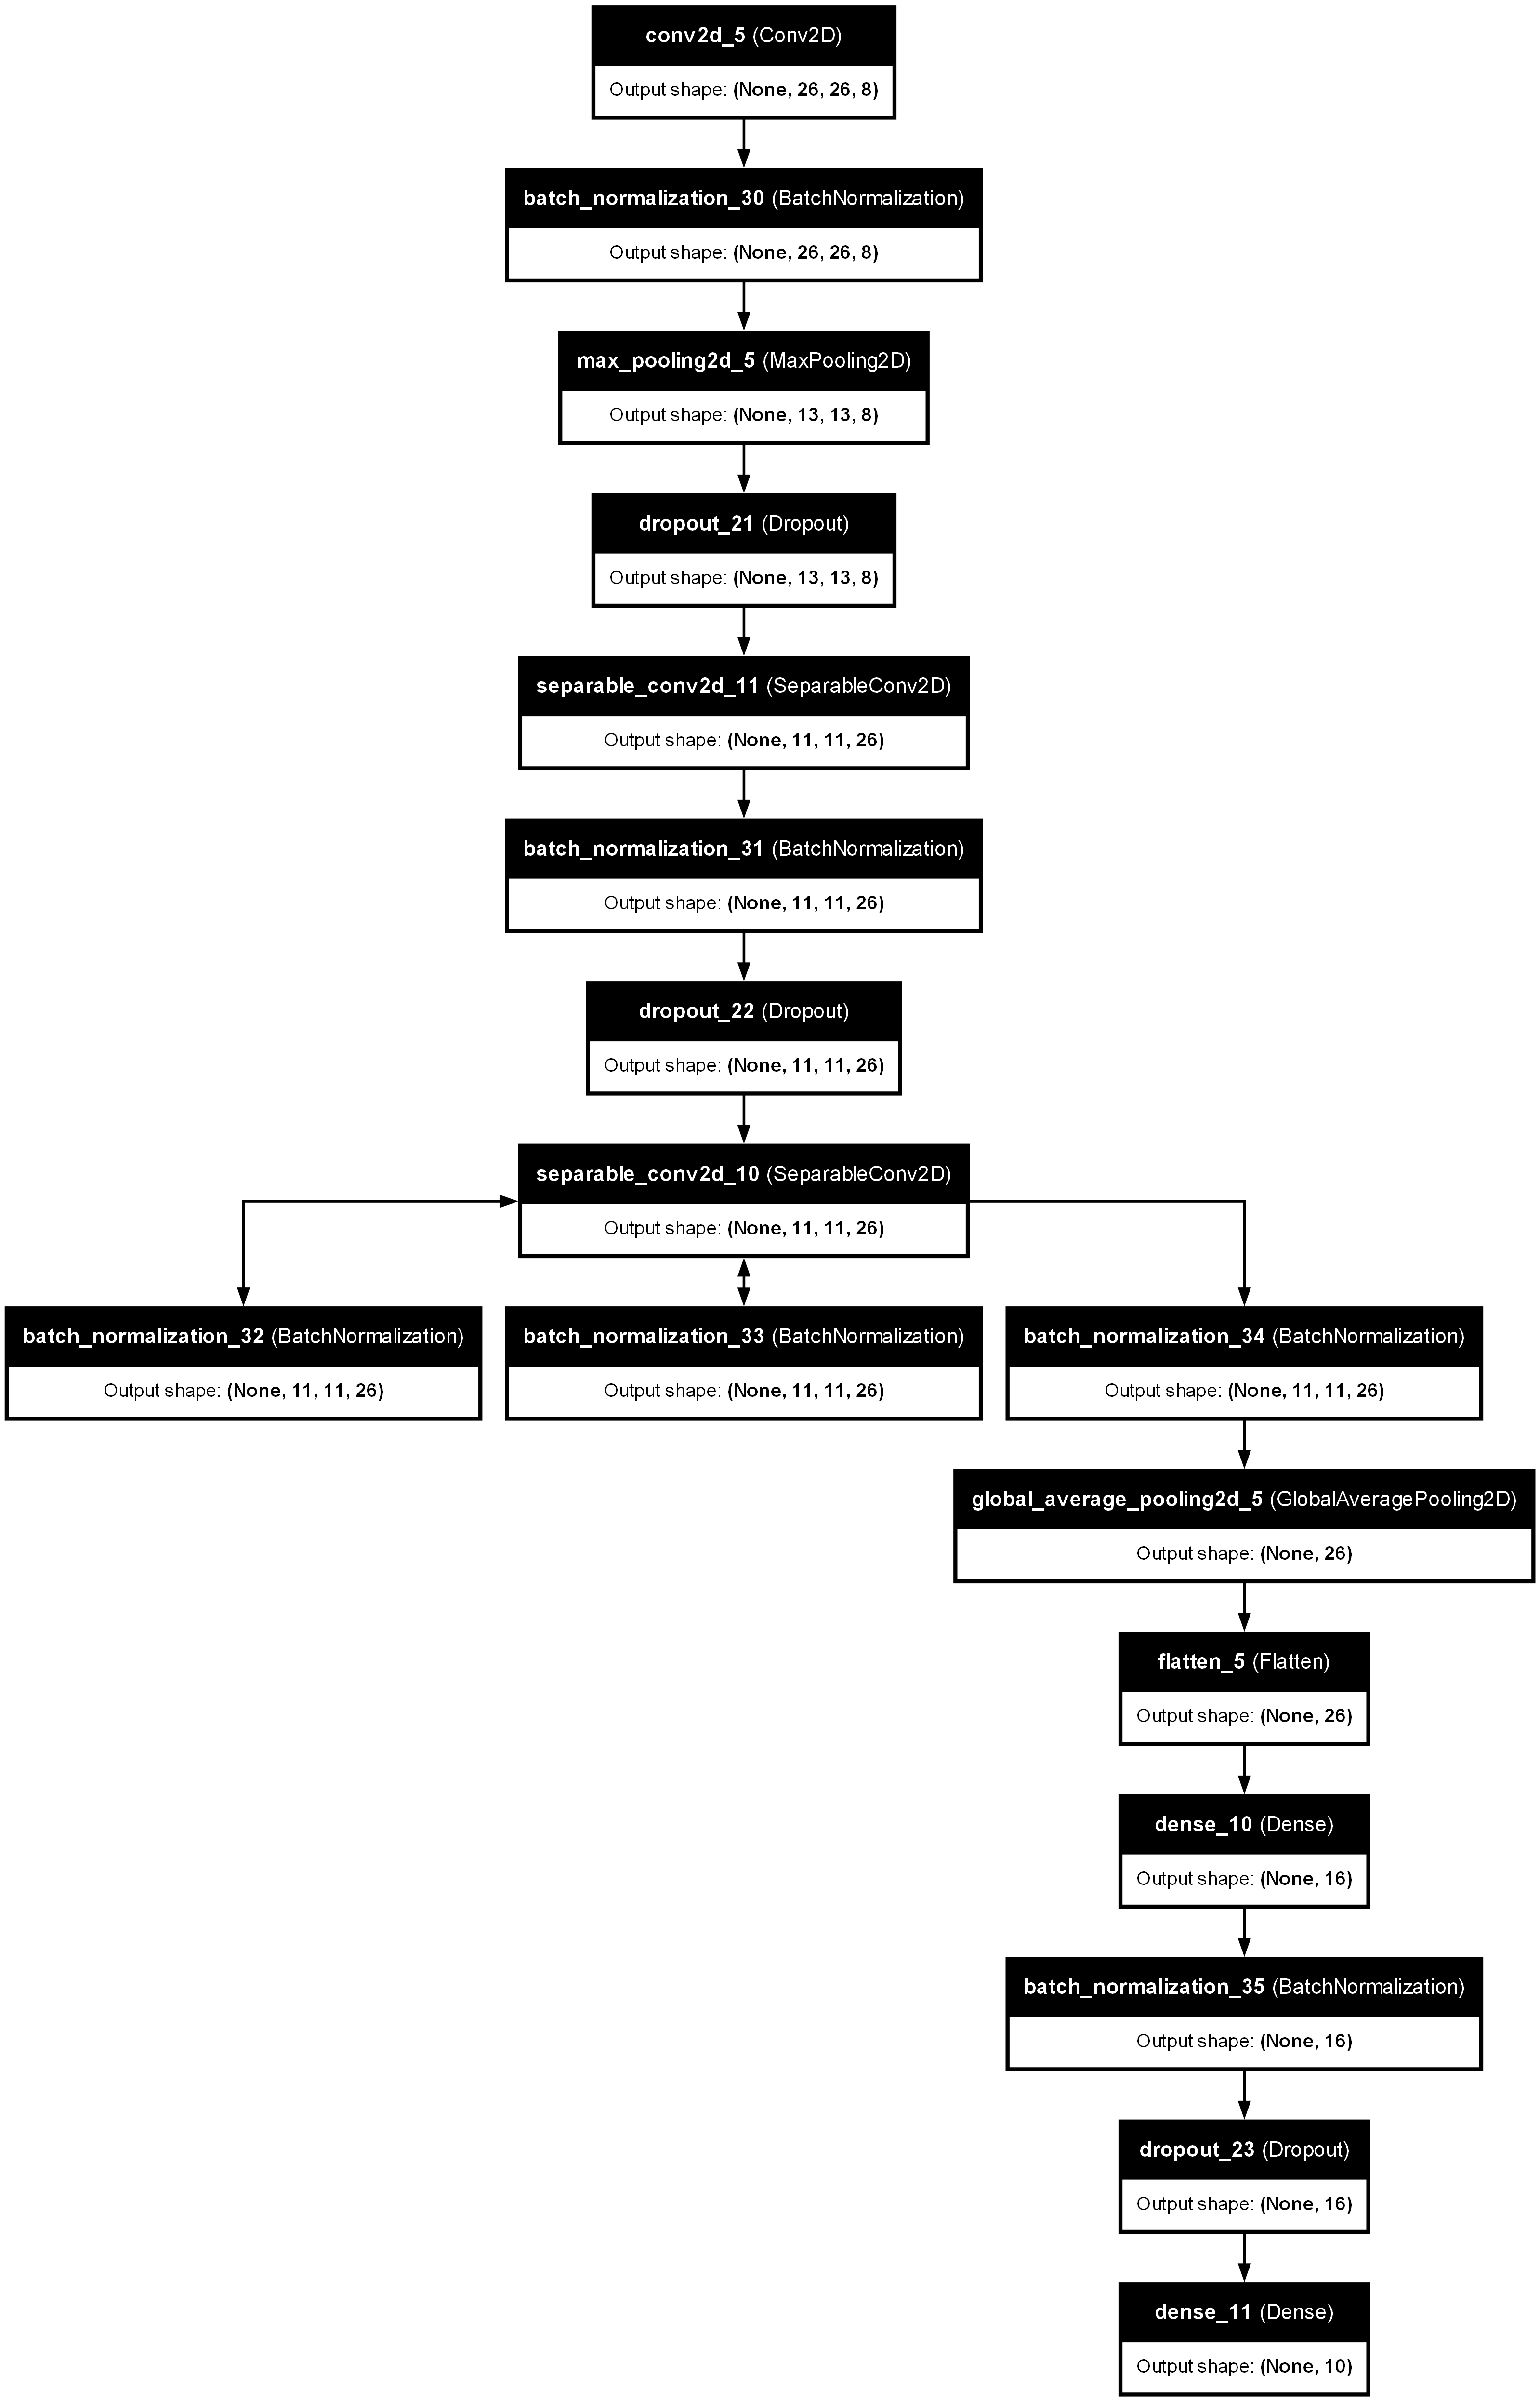

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
conv_layer = layers.SeparableConv2D(26, (3, 3), padding="same")

model_layers = [
    layers.Input((28, 28, 1), dtype=tf.float32),
    layers.Conv2D(8, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.1),
    layers.SeparableConv2D(26, (3, 3)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
]

for i in range(3):
    model_layers.extend([
        conv_layer,
        layers.BatchNormalization(),
    ])

model_layers.extend([
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')  
])

model = tf.keras.models.Sequential(model_layers)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Generate visualization
notebook = []
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
history = model.fit(x_train, y_train, epochs=600, batch_size=256, validation_data= (x_test[::2], y_test[::2]), callbacks=[CustomCallback()])

Epoch 1/600
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2634 - loss: 2.2448
235/235 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.4536 - loss: 1.6475 - val_accuracy: 0.2646 - val_loss: 2.2434
Epoch 2/600
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2915 - loss: 1.8530
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8220 - loss: 0.6134 - val_accuracy: 0.3086 - val_loss: 1.8038
Epoch 3/600
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8351 - loss: 0.5349
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.8807 - loss: 0.3961 - val_accuracy: 0.8528 - val_loss: 0.4814
Epoch 4/600
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9144 - loss: 0.2739
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - accuracy: 0.9047 - loss: 0.3147 - val_accuracy: 0.9260 - val_loss: 0.2397
Epoch 5/600
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8713 - loss: 0.3828
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - accuracy: 0.9152 - loss: 0.2723 - val_accura

KeyboardInterrupt: 

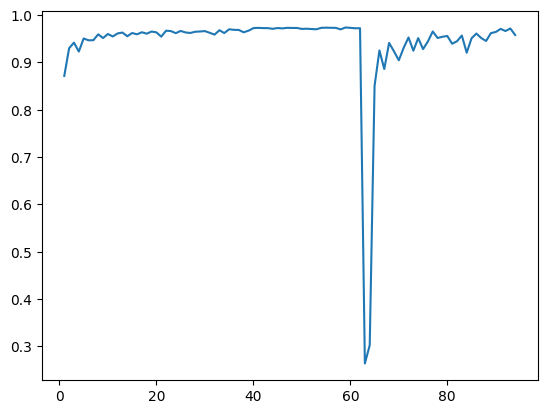

In [12]:
import matplotlib.pyplot as plt
data = notebook
plt.plot(range(1,len(data)+1),data)
plt.show()

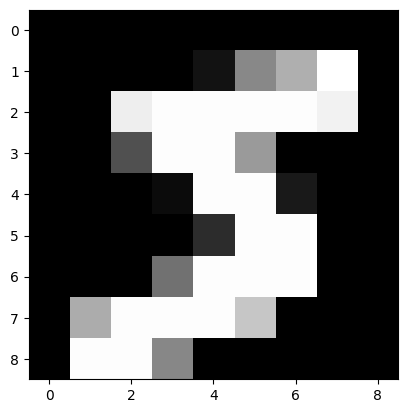

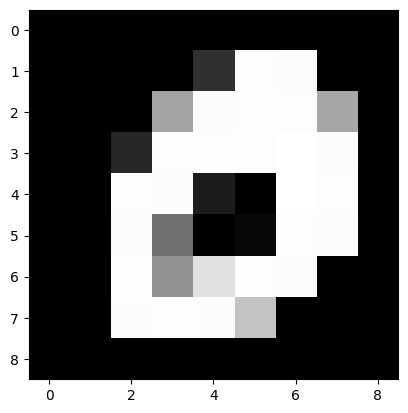

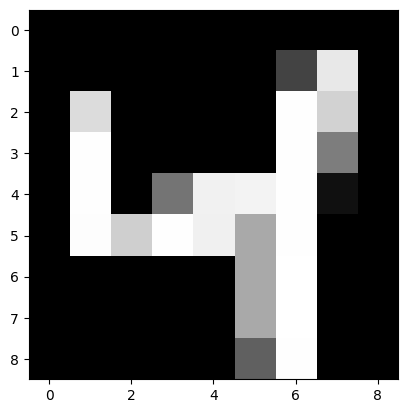

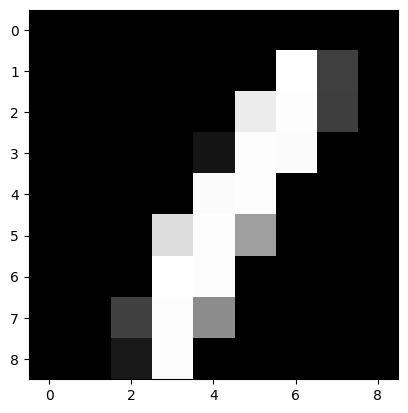

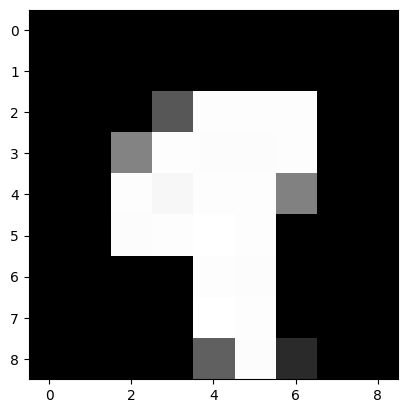

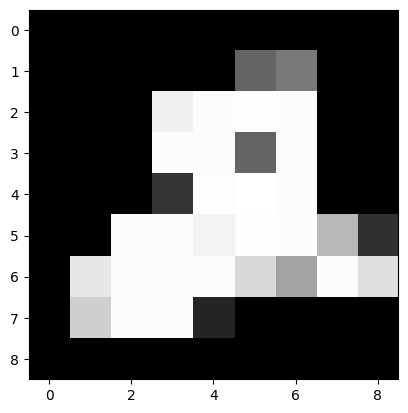

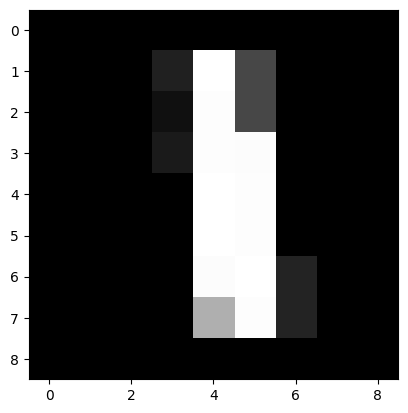

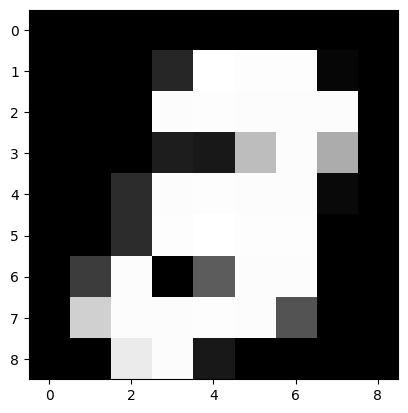

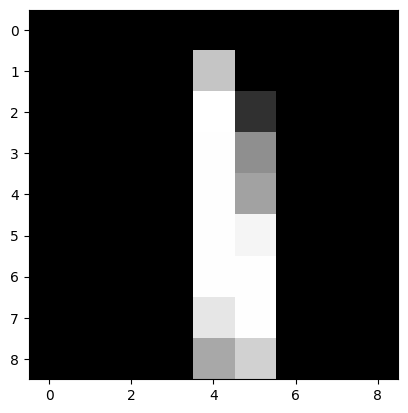

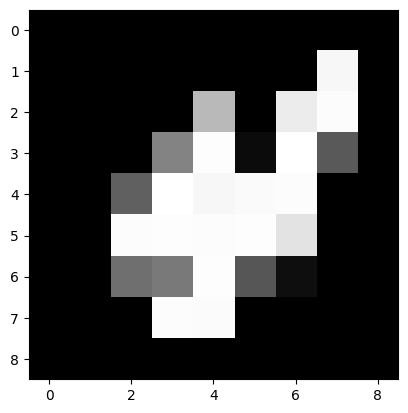

In [77]:
import numpy as np

def maxpool2d(input_data, pool_size, strides):
    """
    Perform 2D max-pooling on the input data.

    Parameters:
    - input_data: 2D numpy array representing the input feature map
    - pool_size: tuple (pool_height, pool_width) representing the size of the pooling window
    - strides: tuple (vertical_stride, horizontal_stride) representing the stride of the pooling operation

    Returns:
    - output_data: 2D numpy array representing the output feature map after max-pooling
    """
    input_height, input_width = input_data.shape
    pool_height, pool_width = pool_size
    vertical_stride, horizontal_stride = strides
    
    # Calculate output dimensions
    output_height = (input_height - pool_height) // vertical_stride + 1
    output_width = (input_width - pool_width) // horizontal_stride + 1
    
    # Initialize output array
    output_data = np.zeros((output_height, output_width))
    
    # Perform max-pooling
    for i in range(0, input_height - pool_height + 1, vertical_stride):
        for j in range(0, input_width - pool_width + 1, horizontal_stride):
            window = input_data[i:i+pool_height, j:j+pool_width]
            output_data[i//vertical_stride, j//horizontal_stride] = np.max(window)
    
    return output_data


for i in range(10):
    plt.imshow(maxpool2d(x_train[i], (3,3), (3,3)), cmap="gray")
    # plt.imshow(x_train[i], cmap="gray")
    plt.show()

In [1]:
import pydot
pydot.Dot.create(pydot.Dot())



b"%!PS-Adobe-3.0\r\n%%Creator: graphviz version 10.0.1 (20240210.2158)\r\n%%Title: G\r\n%%Pages: (atend)\r\n%%BoundingBox: (atend)\r\n%%EndComments\r\nsave\r\n%%BeginProlog\r\n/DotDict 200 dict def\r\nDotDict begin\r\n\r\n/setupLatin1 {\r\nmark\r\n/EncodingVector 256 array def\r\n EncodingVector 0\r\n\r\nISOLatin1Encoding 0 255 getinterval putinterval\r\nEncodingVector 45 /hyphen put\r\n\r\n% Set up ISO Latin 1 character encoding\r\n/starnetISO {\r\n        dup dup findfont dup length dict begin\r\n        { 1 index /FID ne { def }{ pop pop } ifelse\r\n        } forall\r\n        /Encoding EncodingVector def\r\n        currentdict end definefont\r\n} def\r\n/Times-Roman starnetISO def\r\n/Times-Italic starnetISO def\r\n/Times-Bold starnetISO def\r\n/Times-BoldItalic starnetISO def\r\n/Helvetica starnetISO def\r\n/Helvetica-Oblique starnetISO def\r\n/Helvetica-Bold starnetISO def\r\n/Helvetica-BoldOblique starnetISO def\r\n/Courier starnetISO def\r\n/Courier-Oblique starnetISO def\r\n/C